In [0]:
from sklearn import datasets 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = datasets.load_boston()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
# df.head()

In [0]:
df['Target'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


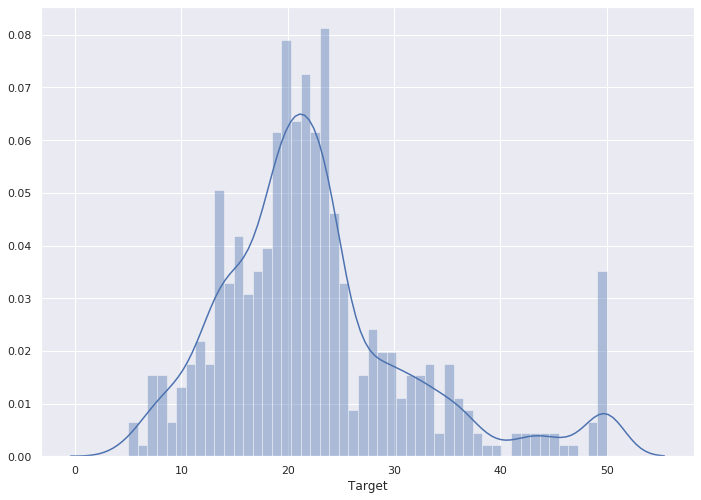

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Target'], bins=50)
plt.show()

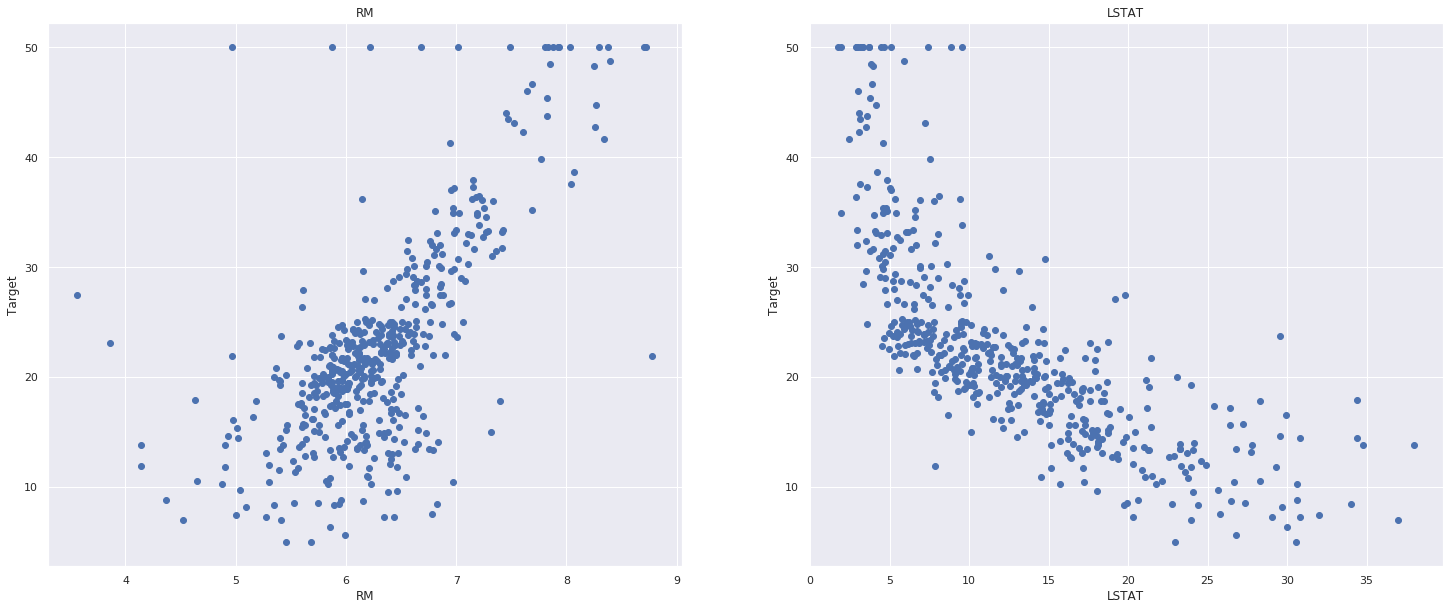

In [0]:
plt.figure(figsize=(25,10))

features = ['RM', 'LSTAT']
target = df['Target']

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[feature]
    y = target


    
    plt.scatter(x, y, marker='o')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Target")

In [0]:
X = pd.DataFrame(np.c_[df['RM']], columns = ['RM'])
Y = df['Target']
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
lin_model.coef_

array([8.82345634])

R2 score is 0.6938399401553497


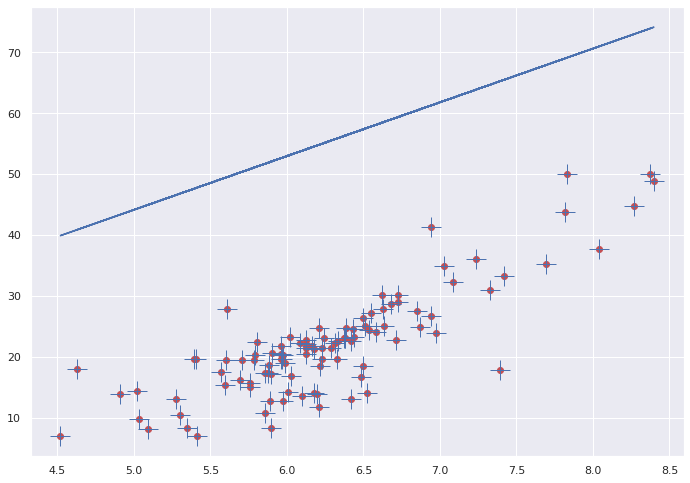

In [0]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

# print("The model performance for training set")
# print("--------------------------------------")
# print('RMSE is {}'.format(rmse))
# print('R2 score is {}'.format(r2))
# print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

# print("The model performance for testing set")
# print("--------------------------------------")
# print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

th = lin_model.coef_
test_x = np.array(X_test).flatten()

plt.plot(X_test, Y_test, 'ro')


test_y = [th[0] * xx for xx in test_x]
# plt.plot(X, Y, 'ro')
plt.plot(X_test, Y_test, 'b+', markersize=20)
plt.plot(test_x, test_y, '-')
plt.show()